---
**Initial value problems for ODEs**

Assignment Week 14 of EMAT30008

https://engmaths.github.io/emat30008/odes/ivps/ 

(See week14funcs.py for associated functions - These functions are also placed in the odefunctions.py main file)

Author: Ben Winstanley, yy23737@bristol.ac.uk

---

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from week14funcs import euler_step, solve_to 
import time

---
**Testing our euler_step function:**

Test ODE: 

$ \dot{x} = x^2 + x \cos(t) $

Calculate single step, from start point $ x(0)=2 $, step size $ h=1 $.
 
(We should get $ 2^2 + 2\cos{0} = 8 $).


In [2]:
def test_euler_step(x: np.ndarray, t: float):
    '''
    Testing function for euler_step function
    RHS of ODE x' = x^2 + xcos(t)
    '''
    dxdt = x**2 + x*np.cos(t)
    return dxdt

xnext = euler_step(test_euler_step, np.array((2)), 0, 1)
print(xnext)

8.0


---
**Testing our solve_to function:**

ODE IVP:  

$ \dot{x} = x , \ x(0) = 1$, 

Using Euler method with step size $  h = 0.12$,  until final time $  t = 1$.

(Note analytical solution is $ x(t) = e ^ t \ \ \forall t $)

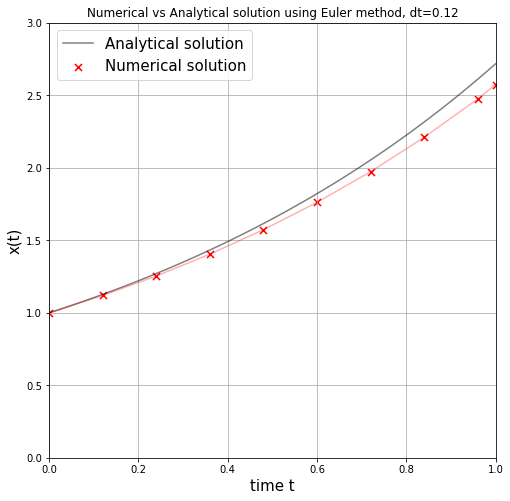

In [3]:
def test_ode_func(x: np.ndarray, t: float):
    '''
    RHS for ODE x'=x
    '''
    dxdt = x
    return dxdt

# Calling function
solution = solve_to(test_ode_func, np.array((1)), 0, 1, 0.12, 'Euler')

# Seperating times and x values
times = solution[:,0]
xvals = solution[:,1:]

# Plotting
plt.figure(figsize=[8,8])
plt.plot(np.linspace(0,1,50), np.exp(np.linspace(0,1,50)), 'k-', label='Analytical solution', alpha=0.5)
plt.scatter(times, xvals, label='Numerical solution', c='r', marker='x', s=50)
plt.plot(times, xvals, c='r', alpha=0.3)
plt.xlabel("time t", fontsize = 15)
plt.ylabel("x(t)", fontsize= 15)
plt.ylim([0,3])
plt.xlim([0,1])
plt.legend(fontsize=15)
plt.title("Numerical vs Analytical solution using Euler method, dt=0.12")
plt.grid()
plt.show()

---
**Calculating error for different step sizes $h$**

Varying step size by magnitude from $10^{-5}$ to $10^{-1}$.

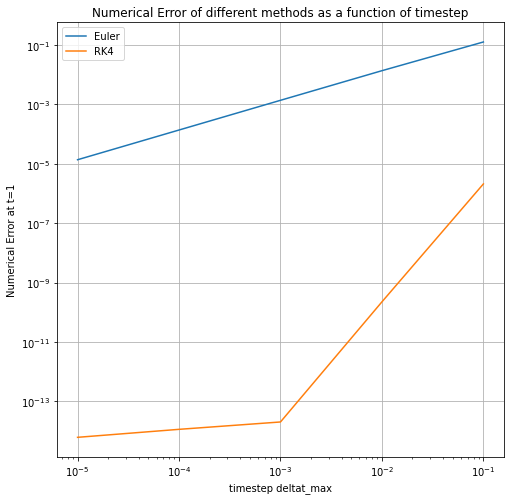

In [7]:
# Initiate store
magnitudes = list(range(-5,0))
euler_error_store = []
rk4_error_store = []
hvals = []

# Loop over different timesteps
for i in magnitudes:
    hvals += [10**i]
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**i, 'Euler')
    error = np.abs(np.exp(1)-solution[-1,-1])
    euler_error_store += [error]
    
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**i, 'RK4')
    error = np.abs(np.exp(1)-solution[-1,-1])
    rk4_error_store += [error]

# Plotting
plt.figure(figsize=[8,8])
plt.loglog(hvals, euler_error_store, label="Euler")
plt.loglog(hvals, rk4_error_store, label="RK4")
plt.xlabel("timestep deltat_max")
plt.ylabel("Numerical Error at t=1")
plt.title("Numerical Error of different methods as a function of timestep")
plt.legend()
plt.grid()
plt.show()

Here we see that the Runge-Kutta 4 method performs better than the Euler method for every value of the timestep. The Runge-Kutta method's error diminishes at a greater rate than the Euler method.

Comparing gradients to estimate scaling:

Euler: 

$ \log(error) = (\frac{-4}{4}) \log( \Delta t) + c  \\ $
$ \to error = A \ (\Delta t)^{(\frac{-4}{4})} = A \ (\Delta t)^{-1} \\ $
So $ \ error = \mathcal{O}((\Delta t)^{-1}) $

RK4:

$ \log(error) = (\frac{-8}{4}) \log( \Delta t) + c  \\ $
$ \to error = A \ (\Delta t)^{(\frac{-8}{4})} = A \ (\Delta t)^{-2} \\ $
So $ \ error = \mathcal{O}((\Delta t)^{-2}) $


---
Note that the error is roughly the same magnitude ($10^{-5}$) for the Euler method at $\Delta t = 10^{-5}$ and the RK4 method at $\Delta t = 10^{-1}$. 

We compare the execution times of each method when producing the same error size:

NOTE: The following cell might take quite long to execute

In [10]:
# Time Euler method at dt = 10^-5, averaged over 20 trials
t0 = time.time()
for i in range(20):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-5, 'Euler')
t1 = time.time()
print("The Euler method at dt = 10^-5 takes time ",(t1-t0)/20,"s")

# Time RK4 method at dt = 10^-1, over 20 trials
t2 = time.time()
for i in range(20):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-1, 'RK4')
t3 = time.time()
print("The RK4 method at dt = 10^-1 takes time ",(t3-t2)/20,"s")

print("The ratio between Euler and RK execution times is ", (t1-t0)/(t3-t2), "\n")

The Euler method at dt = 10^-5 takes time  2.790033257007599 s
The RK4 method at dt = 10^-1 takes time  0.00023664236068725585 s
The ratio between Euler and RK execution times is  11790.083774117173 



We see that for smaller required tolerances / error sizes, the Euler method takes more time to execute than the RK4 method to acheive the same tolerance on the same problem. This is by a factor of ~10,000 for $ error = 10^{-5} $. This is likely due to the Euler method requiring smaller step sizes than the RK4 method to acheive the same tolerance.

---
**Testing our solve_to function on systems of ODEs:**

ODE IVP: 

$ \ddot{x} = -x , \ x(0) = 1, \ \dot{x}(0) = 0 \ $ (Assume starting at rest, away from equillibrium)

We convert to a system of first-order DEs: 

$ \dot{x} =: v , \ \dot{v} = -x, \ x(0) = 1, \ v(0) = 0 $

Using RK4 method with step size $  h = 0.10$,  until final time $  t = 10$.

(Note analytical solution is $ x(t) = \cos(t), \ v(t) = - \sin(t) \ \ \forall t $).\

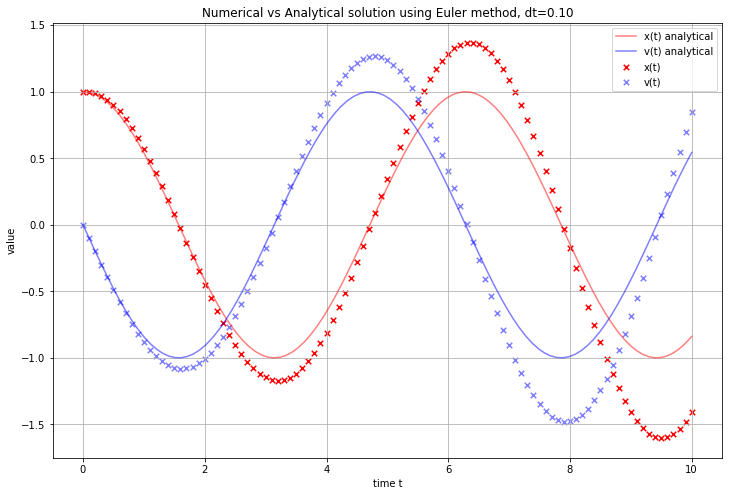

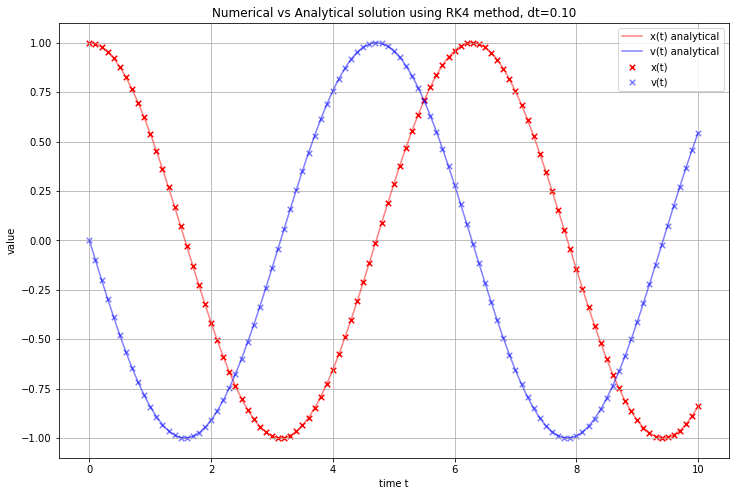

In [11]:
# Defining function
def shmfunc(x,t):
    '''
    RHS of x'' = -x
    let v = x', X = [x v]
    then x' = v = X[1]
    and  v' = -x = -X[0]
    '''
    return np.array((x[1], -x[0]))

# Calling solve_to with Euler method
x_init = np.array((1,0))
solution = solve_to(shmfunc, x_init, 0, 10, 0.10, 'Euler')

# Plotting
plt.figure(figsize=[12,8])
tvals = np.linspace(0,10,100)
plt.plot(tvals,np.cos(tvals), c='r',alpha=0.5, label='x(t) analytical')
plt.plot(tvals,-np.sin(tvals), c='b',alpha=0.5, label='v(t) analytical')
plt.scatter(solution[:,0], solution[:,1], c='r', marker='x', s=30, label='x(t)')
plt.scatter(solution[:,0], solution[:,2], c='b', marker='x', s=30,label='v(t)', alpha=0.5)
plt.title("Numerical vs Analytical solution using Euler method, dt=0.10")
plt.xlabel("time t")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.show()


# Calling solve_to with RK4 method
solution = solve_to(shmfunc, x_init, 0, 10, 0.10, 'RK4')

# Plotting
plt.figure(figsize=[12,8])
plt.plot(tvals,np.cos(tvals), c='r',alpha=0.5, label='x(t) analytical')
plt.plot(tvals,-np.sin(tvals), c='b',alpha=0.5, label='v(t) analytical')
plt.scatter(solution[:,0], solution[:,1], c='r', marker='x', s=30, label='x(t)')
plt.scatter(solution[:,0], solution[:,2], c='b', marker='x', s=30,label='v(t)', alpha=0.5)
plt.title("Numerical vs Analytical solution using RK4 method, dt=0.10")
plt.xlabel("time t")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.show()

---
**Assessing effects of numerical error over a large range of t**

We plot the numerical solution in the phase plane $x$ vs $\dot{x}$:

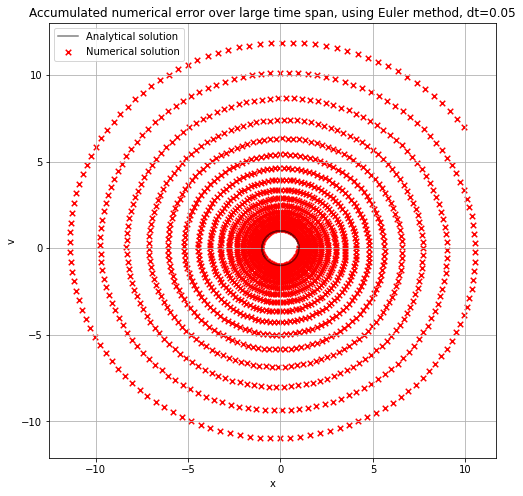

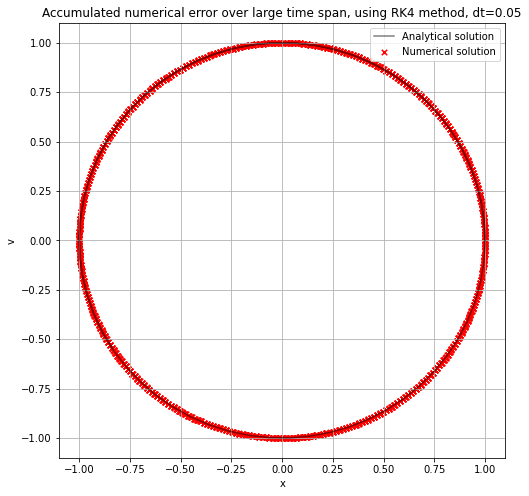

In [12]:
tfinal = 100
solution = solve_to(shmfunc, x_init, 0, tfinal, 0.05, 'Euler')

# Plotting
plt.figure(figsize=[8,8])
tvals = np.linspace(0,10,100)
plt.plot(np.cos(tvals),np.sin(tvals), c='k',alpha=0.5, label='Analytical solution')
plt.scatter(solution[:,1], solution[:,2], c='r', marker='x', s=30, label='Numerical solution')
plt.title("Accumulated numerical error over large time span, using Euler method, dt=0.05")
plt.xlabel("x")
plt.ylabel("v")
plt.legend()
plt.grid()
plt.show()

solution = solve_to(shmfunc, x_init, 0, tfinal, 0.05, 'RK4')

# Plotting
plt.figure(figsize=[8,8])
tvals = np.linspace(0,10,100)
plt.plot(np.cos(tvals),np.sin(tvals), c='k',alpha=0.5, label='Analytical solution')
plt.scatter(solution[:,1], solution[:,2], c='r', marker='x', s=30, label='Numerical solution')
plt.title("Accumulated numerical error over large time span, using RK4 method, dt=0.05")
plt.xlabel("x")
plt.ylabel("v")
plt.legend()
plt.grid()
plt.show()

We see that the numerical solution generated by the Euler method diverges from the stable circular orbit of the analytical solution, and slowly 'spirals' outwards, reaching a radius of around 12 after 100 seconds. The numerical solution generated by the RK4 method doesn't diverge from the analytical solution and remains following a stable circular orbit after 100 seconds.

---
**Testing implementation of 2nd order Runge-Kutta method (RK2)**

Using above ODE, with RK2 method with step size $  h = 0.10$,  until final time $  t = 10$.

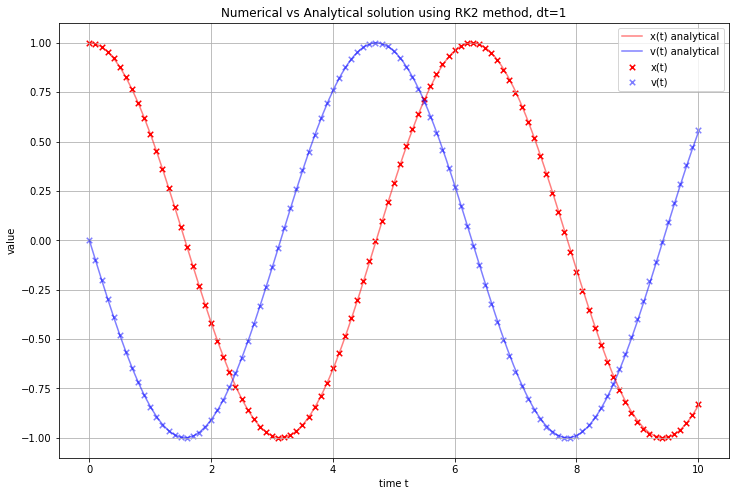

In [13]:
# Calling solve_to with RK2 method
solution = solve_to(shmfunc, x_init, 0, 10, 0.1, 'RK2')

# Plotting
plt.figure(figsize=[12,8])
plt.plot(tvals,np.cos(tvals), c='r',alpha=0.5, label='x(t) analytical')
plt.plot(tvals,-np.sin(tvals), c='b',alpha=0.5, label='v(t) analytical')
plt.scatter(solution[:,0], solution[:,1], c='r', marker='x', s=30, label='x(t)')
plt.scatter(solution[:,0], solution[:,2], c='b', marker='x', s=30,label='v(t)', alpha=0.5)
plt.title("Numerical vs Analytical solution using RK2 method, dt=1")
plt.xlabel("time t")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.show()

---

Note that the functions developed here are also placed in our odefunctions.py module, and some changes were made to the docstring, and to make the euler, rk4 and rk2 steps as their own functions to be called by solve_to. These can be found in the commit history of odefunctions.py